In [63]:
using ITensors
using Plots
include("TE_data.jl")
include("functions.jl")
include("TrajectorySampler.jl")


sample_trajectory (generic function with 1 method)

In [73]:
N = 20
Jx = 1.
Jz = 1.
h = .5
gamma = 1.

dissipation = "S-"

maxdim = 300
cutoff = 1E-8
conserve_qns = false
track_states = true
track_entropy = true
track_local_observables = ["Sz", "Sx"]

optimal = false

# time evolution
t_end = 5.
tau = 0.1
dt = 0.01


v_t = Array((0.: tau: t_end))


# prepare TE
params = XXZ_data(N, Jx, Jz, h, gamma, dissipation)
ted = TE_data_XXZ(params, dt; maxdim=maxdim, cutoff=cutoff, conserve_qns=conserve_qns)

# initial state
psi = productMPS(ted.s, n-> isodd(n) ? "Up" : "Dn")

data_opt = sample_trajectory(psi, ted, v_t; 
    track_states=track_states, 
    track_entropy=track_entropy, 
    track_local_observables=track_local_observables, 
    optimal=true)

data_bare = sample_trajectory(psi, ted, v_t; 
    track_states=track_states, 
    track_entropy=track_entropy, 
    track_local_observables=track_local_observables, 
    optimal=false)

0.00999968751002586
0.009998755115643727
0.009997191867454206
0.009994999427814786
0.009992176515478771
0.009988722014107535
0.009984765959837903
6.245102561856419e-8
2.50019357200432e-7
5.636889653598957e-7
9.965833769178027e-7
1.5499366620148652e-6
2.2410779451494115e-6
3.0607440082361275e-6
4.0096353455019554e-6
5.043563293918822e-6
6.192300484927868e-6
7.522814957285077e-6
8.904087742144579e-6
1.0397517500298816e-5
1.2113947668401511e-5
1.3836636956627704e-5
1.5816384380850373e-5
1.793398293646429e-5
2.0190674128340113e-5
2.2375647329661806e-5
2.490285097726969e-5
2.7573203962565155e-5
3.010088572647232e-5
3.273535151086422e-5
3.547646591505267e-5
3.83241504953879e-5
4.127838299953796e-5
4.4339196537544184e-5
4.750667868985595e-5
5.0780970552583565e-5
5.416226572024999e-5
5.820666086914564e-5
6.181704993513075e-5
6.553514039885925e-5
7.003125752947409e-5
7.398143153863792e-5
7.879483031762209e-5
8.297940674266516e-5
8.727370392672983e-5
9.167833545090517e-5
9.712473494798909e-5
0.0

0.0029854303395578157
0.0029976792485229293
0.002988749989481226
0.0029796303027407856
0.002970323984983778
0.00296083487377659
0.0029719898491642233
0.002982952052062639
0.0029937230314533115
0.003004304403726264
0.0030146978509746646
0.0030038668659489727
0.0029928750720871894
0.0029817266302053754
0.0029917478283429627
0.00298023469773482
0.002968576461405923
0.002956777389753997
0.0029656437444541208
0.002953508962339878
0.0029412450873718176
0.002928856475261789
0.0029163474965340475
0.0029243560198658385
0.0029115504236590516
0.0028986364792306716
0.002906177093557856
0.00289298960798827
0.002879705920233546
0.0028663304891478735
0.002852867777359104
0.0028596848374062666
0.0028663805060692078
0.0028729574011326646
0.00285897025090497
0.0028449147734046377
0.0028511227460032273
0.002836870835298568
0.002842855070912675
0.002828421919741604
0.0028139406357832013
0.002819607463604605
0.0028251850876650463
0.002810435791105323
0.002795654019313839
0.0028009550147094853
0.00280618014

Dict{Any,Any} with 4 entries:
  "psi" => MPS[MPS…
  "S"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0174473 … -8.88178e-16 0.0; … ; 0.0 0.0054…
  "Sz"  => [0.5 -0.5 … 0.5 -0.5; 0.496847 -0.494428 … -0.499902 -0.499409; … ; …
  "Sx"  => [0.0 0.0 … 0.0 0.0; 6.85468e-5 -0.000136926 … 0.000576567 0.00014481…

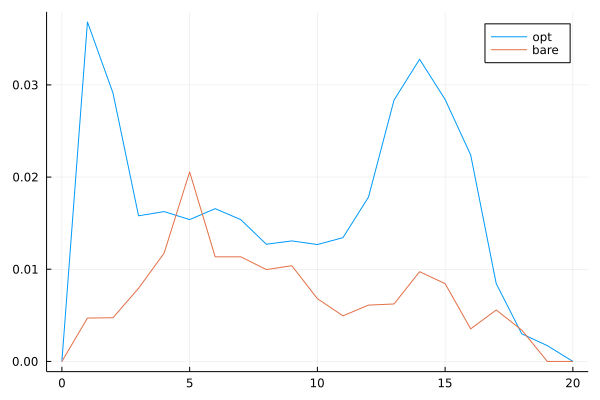

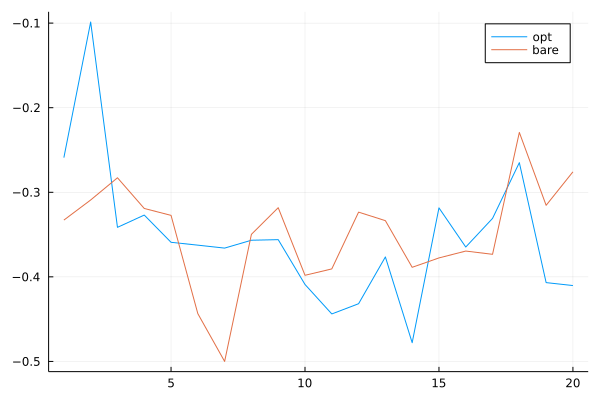

In [75]:

plot(1:N, data_opt["Sz"][end,:], label="opt")
plot!(1:N, data_bare["Sz"][end,:], label="bare")

In [62]:
a = Dict()

a["g"] = 4
a["h"] = 5

for k in keys(a)
    print(k)
end

gh

In [3]:
for i in 1:length(v_psi)
    mbd = maxlinkdim(v_psi[i])
    t = v_t[i]
    Sz = expect(v_psi[i], "Sz"; sites=div(N,2))
    println("$t $mbd")
end

0.0 1
0.1 2
0.2 2
0.3 3
0.4 3
0.5 4
0.6 4
0.7 4
0.8 4
0.9 4
1.0 4
1.1 5
1.2 5
1.3 6
1.4 6
1.5 6
1.6 7
1.7 7
1.8 8
1.9 8
2.0 8
2.1 9
2.2 10
2.3 10
2.4 11
2.5 11
2.6 12
2.7 12
2.8 13
2.9 13
3.0 13
3.1 14
3.2 14
3.3 15
3.4 16
3.5 17
3.6 18
3.7 18
3.8 19
3.9 20
4.0 20
4.1 20
4.2 20
4.3 20
4.4 21
4.5 21
4.6 22
4.7 23
4.8 23
4.9 24
5.0 25


In [27]:
i = 3
s1 = ted.s[i]
s2 = ted.s[i+1]

c1 = ted.c_gates[i]
c2 = ted.c_gates[i+1]

print( c1*op("Id",s2) + op("Id",s1)*c2 )

ITensor ord=4
Dim 1: (dim=2|id=649|"S=1/2,Site,n=3")'
Dim 2: (dim=2|id=649|"S=1/2,Site,n=3")
Dim 3: (dim=2|id=494|"S=1/2,Site,n=4")'
Dim 4: (dim=2|id=494|"S=1/2,Site,n=4")
NDTensors.Dense{Float64,Array{Float64,1}}
 2×2×2×2
[:, :, 1, 1] =
 0.0  0.0
 1.0  0.0

[:, :, 2, 1] =
 1.0  0.0
 0.0  1.0

[:, :, 1, 2] =
 0.0  0.0
 0.0  0.0

[:, :, 2, 2] =
 0.0  0.0
 1.0  0.0

In [72]:
if 1>2
    println("1")
elseif 2<3
    println("2")
else
    println("3")
end

2


In [ ]:
s = siteinds("S=1/2", 100; conserve_qns=true)
psi = productMPS(s, "Dn")
i = 3
S = op("S-",s[i])

HS = replaceprime(dag(S), 0 => 2 )
HS_S = replaceprime(HS*S, 2 => 1 )

ket = psi[i]
bra = dag(prime(ket,"Site"))

print((bra*HS_S*ket)[1])

In [50]:
using Optim
f(x) = sin(x[1])

res = optimize(f, [0.0],GradientDescent(), Optim.Options(f_tol = 1e-10,
                             iterations = 20,
                             store_trace = true,
                             show_trace = true))

#a = Optim.minimizer(res)

Iter     Function value   Gradient norm 
     0     0.000000e+00     1.000000e+00
 * time: 8.20159912109375e-5
     1    -9.833405e-01     1.817731e-01
 * time: 0.0021059513092041016
     2    -1.000000e+00     2.404493e-04
 * time: 0.0034530162811279297
     3    -1.000000e+00     5.835978e-12
 * time: 0.004703044891357422


 * Status: success

 * Candidate solution
    Final objective value:     -1.000000e+00

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.40e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.53e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.89e-08 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 2.89e-08 ≰ 1.0e-10
    |g(x)|                 = 5.84e-12 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    3
    f(x) calls:    9
    ∇f(x) calls:   9


In [23]:

let
  N = 20
  cutoff = 1E-8
  tau = 0.1
  ttotal = 5.0

  # Make an array of 'site' indices
  s = siteinds("S=1/2", N; conserve_qns=true)

  # Make gates (1,2),(2,3),(3,4),...
  gates = ITensor[]
  for j in 1:(N - 1)
    s1 = s[j]
    s2 = s[j + 1]
    hj =
      op("Sz", s1) * op("Sz", s2) +
      1 / 2 * op("S+", s1) * op("S-", s2) +
      1 / 2 * op("S-", s1) * op("S+", s2)
    Gj = exp(-im * tau / 2 * hj)
    push!(gates, Gj)
  end
  # Include gates in reverse order too
  # (N,N-1),(N-1,N-2),...
  append!(gates, reverse(gates))

  # Initialize psi to be a product state (alternating up and down)
  psi = productMPS(s, n -> isodd(n) ? "Up" : "Dn")

  c = div(N, 2) # center site

  # Compute and print <Sz> at each time step
  # then apply the gates to go to the next time
  for t in 0.0:tau:ttotal
    #Sz = expect(psi, "Sz"; sites=c)
    mbd = maxlinkdim(psi)
    println("$t $mbd")

    t≈ttotal && break

    psi = apply(gates, psi; cutoff)
    normalize!(psi)
  end

  return
end
    


0.0 1
0.1 2
0.2 4
0.3 4
0.4 4
0.5 4
0.6 4
0.7 5
0.8 6
0.9 6
1.0 7
1.1 8
1.2 8
1.3 8
1.4 9
1.5 9
1.6 10
1.7 11
1.8 11
1.9 12
2.0 13
2.1 14
2.2 15
2.3 17
2.4 17
2.5 18
2.6 19
2.7 21
2.8 22
2.9 23
3.0 24
3.1 26
3.2 27
3.3 29
3.4 31
3.5 33
3.6 35
3.7 37
3.8 40
3.9 42
4.0 45
4.1 48
4.2 50
4.3 53
4.4 56
4.5 59
4.6 62
4.7 65
4.8 69
4.9 74
5.0 79


In [ ]:
maxlinkdim(psi)

In [ ]:
Threads.nthreads()

In [ ]:
struct TE_data
    
    H_gates::Array{ITensor,1}
    c_gates::Array{ITensor,1}
    cdc_gates::Array{ITensor,1}
    Hcdc_gates::Array{ITensor,1}
    
    cutoff::Float64
    maxdim::Int64
end

# prepare H gates
function prepare_H!(ted::TE_data, J::Float64, h::Float64. s::Site)
    H_gates = ITensor[]
    for j in 1:(N-1)
        s1 = s[j]
        s2 = s[j + 1]
        hj = 
            h * op("Sz", s1) * op("Sz", s2) +
            J * op("S+", s1) * op("S-", s2) + 
            J * op("S-", s1) * op("S+", s2)

        Gj = exp(-im * tau/2 * hj)
        push!(H_gates, Gj)
    end
    append!(H_gates, reverse(H_gates)))

In [ ]:
typeof(s)

In [ ]:
function apply_gates!(psi::MPS, gates::Array{ITensor,1}, cutoff=1E-8)
    psi = apply(gates, psi; cutoff)
end

function collect_jump_probabilities(
        psi::MPS, 
        cdc_gates::Array{ITensor,1})::Array{Float64,1}
    # collect click probabilities
    normalize(psi)
    pc = Float64[]
    for (i, cdc) in enumerate(cdc_gates)
        orthogonalize!(psi,i)
        ket = psi[i]
        bra = dag(prime(ket,"Site"))
        push!(pc, (bra*cdc*ket)[1] )
        #push!(pc, inner(psi',cdc,psi))
    end
        
    return pc
end

function apply_optimal_jump(psi::MPS, c1::ITensor, c2::ITensor)
end

function select_and_apply_jumps!(
        psi::MPS, 
        c_gates::Array{ITensor,1}, 
        cdc_gates::Array{ITensor,1}, 
        Hcdc_gates::Array{ITensor,1},
        optimal::Bool)
    
    pc = collect_jump_probabilities(psi, cdc_gates)
     
    if optimal
        offset = mod( rand(Int), 2 )
        L = length(psi)
        
        # check boundaries
        if offset == 1 && pc[1] > rand(Float64)
            psi = apply(c_gates[1], psi)
        end
        if mod(L-offset,2) == 1 && pc[end] > rand(Float64)
            psi = apply(c_gates[end], psi)
        end
        normalize!(psi)
        
        # loop through chain
        for i in offset:2:L
            
            # two jumps
            if pc[i]*pc[i+1] > rand(Float64)
                psi = apply(c_gates[i:i+1], psi)
            # one jump
            elseif pc[i] + pc[i+1] > rand(Float64)
                U = apply_optimal_jump!(psi, c_gates[i], c_gates[i+1])
            # no jump
            else
                psi = apply(Hcdc_gates[i:i+1],psi)
            end
            
            normalize!(psi)
        end
        
        
    else # just do direct jumps
        for (i,p) in enumerate(pc)
            if p > rand(Float64)
                psi = apply(c_gates[i], psi)
            else
                psi = apply(Hcdc_gates[i],psi)  
            end
            normalize!(psi)
        end
    end
        
end
            
            
        
    
function sample_trajectory(
        psi0::MPS,
        H_gates::Array{ITensor,1}, 
        c_gates::Array{ITensor,1}, 
        v_t::Array{Float64,1})
    
    # time step for integration
    tau = v_t[2]-v_t[1]
    
    # prepare dissipative operators
    cdc_gates = ITensor[]
    Hcdc_gates = ITensor[]
    
    for (i,c) in enumerate(c_gates)
        cd = replaceprime(dag(c), 0 => 2 )
        cdc = replaceprime(cd*c, 2 => 1 )
        push!(cdc_gates, cdc)
        push!(Hcdc_gates, exp(-tau/2 * cdc) )
    end
    
    # save MPS in vector
    v_psi = MPS[]
    
    # push first psi
    push!(v_psi, psi)
    
    for t in v_t
        # apply Hamiltonian evolution
        apply_gates!(psi,H_gates; cutoff)
        
        # select jumps
        select_and_apply_jumps!(psi, c_gates, cdc_gates, Hcdc_gates)
        
        push!(v_psi,psi)
    end
    
    return v_psi
end
    

    
    
        
        
    

In [ ]:
maxlinkdim(psi)

In [ ]:
v_S = Vector{Float64}()

for b in 0:N
    #orthogonalize!(psi, b)
    S = entropy_von_neumann(psi, b)
    push!(v_S, S)
end

In [ ]:

t = entropy_von_neumann!(psi, 60)
ortho_lims(psi)

In [ ]:
mutable struct test
    x::Float64
    y::Int64
end

In [ ]:
ts = test(4.,64)

ts.y

In [ ]:
apply(op("Sz", s[50]), psi)
#psi[50] = new_A
#orthogonalize!(psi,50)

In [ ]:
plot(rand(10))  